In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
conn = sqlite3.connect("Spotify_Database.db")
df = pd.read_sql_query("SELECT * FROM Spotify_songs", conn)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

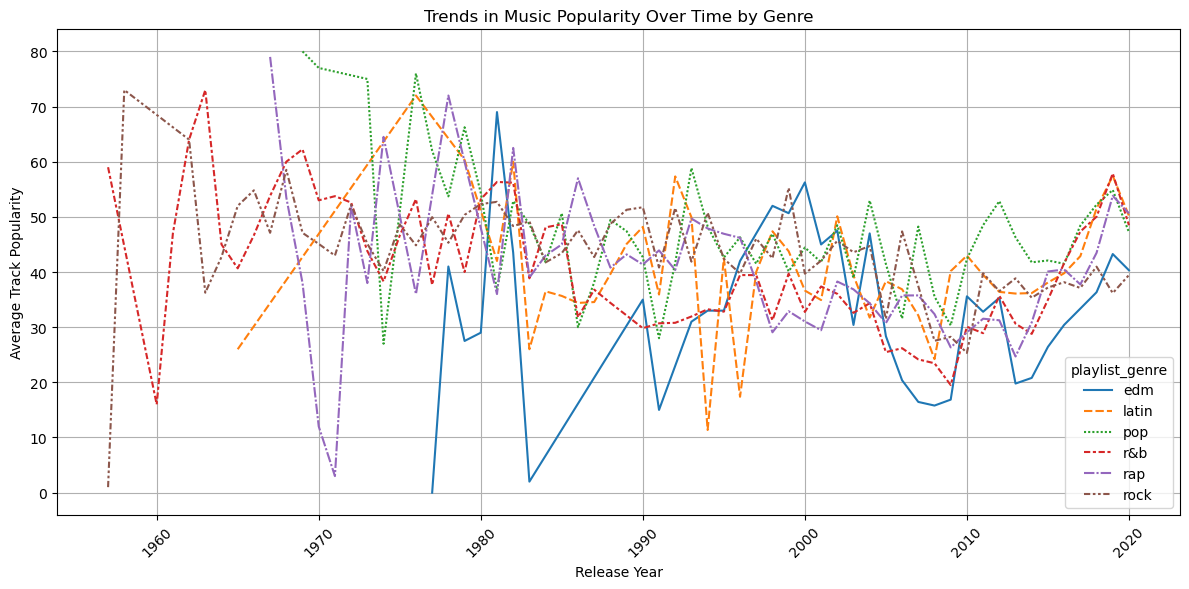

In [9]:
#1.Trends in Music Popularity Over Time: Analyze how track popularity varies over time and across different genres.

#To answer this question, I grouped the data by release year and genre, calculated the average track popularity for each group 
#and created visualizations to display these trends.

popularity_trends = df.groupby(['release_year', 'playlist_genre'])['track_popularity'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.lineplot(data=popularity_trends, palette="tab10", linewidth=1.5)
plt.title('Trends in Music Popularity Over Time by Genre')
plt.ylabel('Average Track Popularity')
plt.xlabel('Release Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

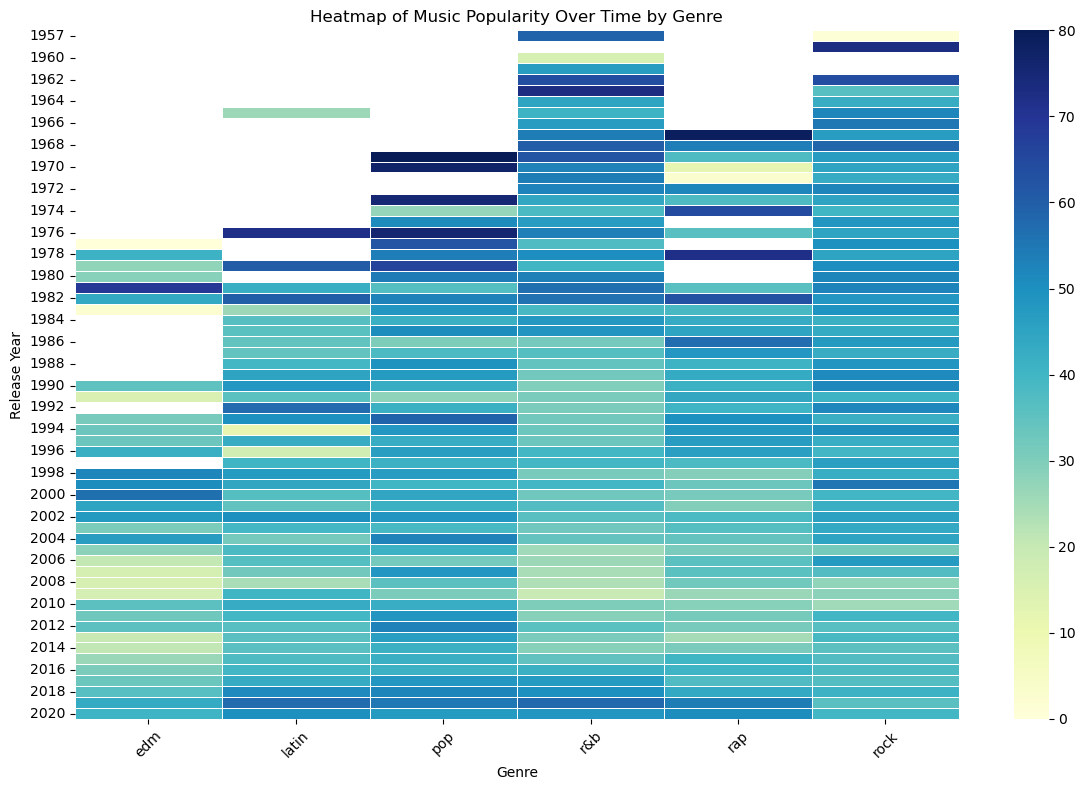

In [4]:
#Then I created a heatmap to showcase genre-wise popularity trends over time.

plt.figure(figsize=(12, 8))
sns.heatmap(popularity_trends, cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Music Popularity Over Time by Genre')
plt.ylabel('Release Year')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

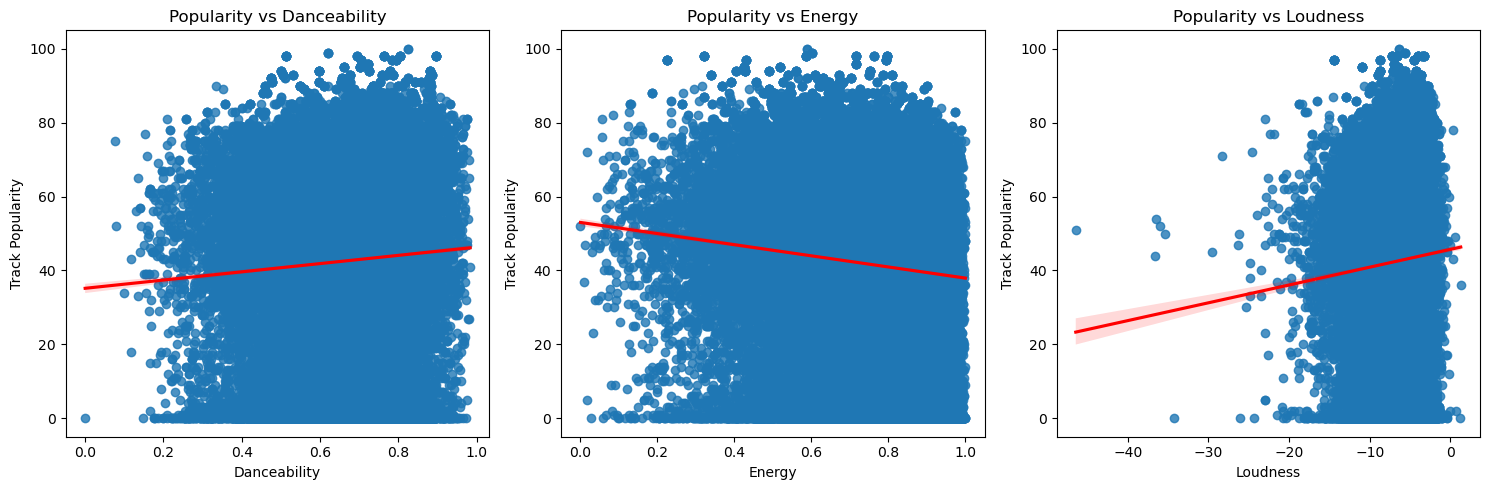

In [5]:
#2.Relationship Between Audio Features and Track Popularity: Explore how various audio features (like danceability, energy, loudness) 
#correlate with the track's popularity.

#For this question I created scatter plots with a linear trend line for each feature against track popularity. 
#The trend line helps to visualize the general direction and strength of the relationship: If the trend line slopes upward, 
#it suggests a positive relationship; as the feature value increases, the track popularity tends to increase.

features_to_plot = ['danceability', 'energy', 'loudness']

mean_features_by_popularity = df.groupby('popularity_category')[features_to_plot].mean()
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.regplot(x=feature, y='track_popularity', data=df, line_kws={"color":"red"})
    plt.title(f'Popularity vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Track Popularity')

plt.tight_layout()
plt.show()

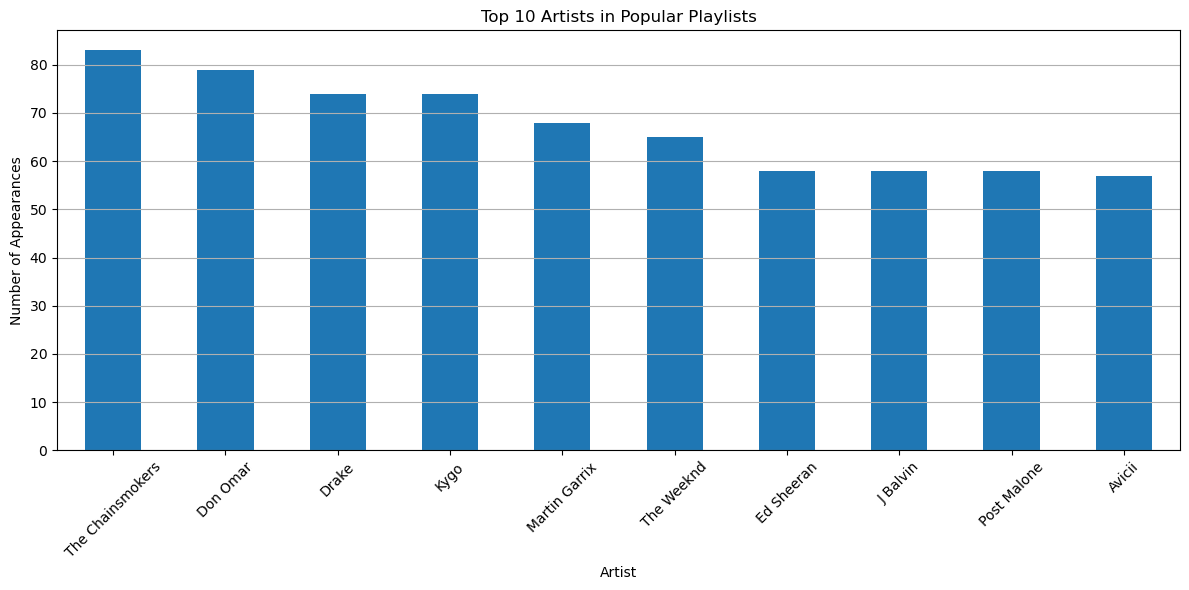

In [6]:
#3.Distribution of the top 10 Artists and the genres in Popular Playlists: Identify which artists 
#or genres are more common in popular playlists.

#For question number 3, I determined popular playlists base on the average popularity of tracks, 
#considering that a playlist is popular if its average track popularity is above the median. 
#I used bar charts to show the most common artists and pie charts to represent the genre distribution.

# First I calculated the average popularity of tracks in each playlist
playlist_popularity = df.groupby('playlist_name')['track_popularity'].mean()

# Then I determined the median popularity across playlists
median_playlist_popularity = playlist_popularity.median()

# I identified the popular playlists
popular_playlists = playlist_popularity[playlist_popularity >= median_playlist_popularity].index

# Analyzing artist and genre distribution in popular playlists
popular_playlists_data = df[df['playlist_name'].isin(popular_playlists)]

# Counting appearances of each artist in popular playlists
artist_counts = popular_playlists_data['track_artist'].value_counts().head(10)

# Counting the distribution of genres in popular playlists
genre_counts = popular_playlists_data['playlist_genre'].value_counts()

# Visualization in a bar chart
plt.figure(figsize=(12, 6))
artist_counts.plot(kind='bar')
plt.title('Top 10 Artists in Popular Playlists')
plt.ylabel('Number of Appearances')
plt.xlabel('Artist')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

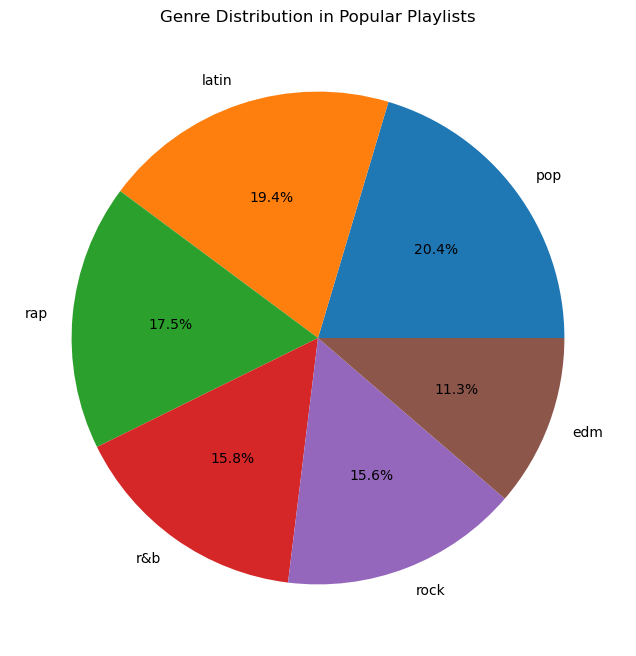

In [7]:
# Here is the vizualisation of the genre distribution in popular playlists in a pie chart

plt.figure(figsize=(8, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Genre Distribution in Popular Playlists')
plt.ylabel('')  # Hiding the y-label for clarity

plt.show()


In [8]:
#4.Most Popular and Least Popular Genres: Determine which genres are most and least popular on Spotify based on average track popularity.

#For this question I grouped the data based on the playlist_genre field and for each genre group I calculated the average track popularity. 
#Then I sorted these genres by their average popularity to find the least and most popular genres.

average_popularity_by_genre = df.groupby('playlist_genre')['track_popularity'].mean().sort_values()

least_popular_genres = average_popularity_by_genre.head(5)
most_popular_genres = average_popularity_by_genre.tail(5)

#Here, I generated a text for the least and most popular genres to display when printing the results, 
#in order to make it more coprehensive.

least_popular_text = "Least Popular Genres on Spotify:\n" + "\n".join(
    [f"{genre}: {popularity:.2f}" for genre, popularity in least_popular_genres.items()])
most_popular_text = "Most Popular Genres on Spotify:\n" + "\n".join(
    [f"{genre}: {popularity:.2f}" for genre, popularity in most_popular_genres.items()])

print(least_popular_text)
print("\n")
print(most_popular_text)

Least Popular Genres on Spotify:
edm: 34.83
r&b: 41.22
rock: 41.73
rap: 43.22
latin: 47.03


Most Popular Genres on Spotify:
r&b: 41.22
rock: 41.73
rap: 43.22
latin: 47.03
pop: 47.74
